# Assignment 4
## Cloud Microphysics 2020
## Andrew Loeppky

## Question 1
(8 points) <br>
Objective: Given the drop size distribution of the blue histogram shown in Figure 1, find
the best fit equation to describe the distribution using the (a) gamma size distribution
function, and (b) lognormal size distribution. Overlay both fits with the histogram.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

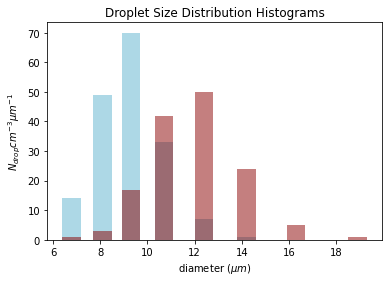

In [66]:
# Recreate the histogram given
diameter = np.array([6.79, 8.08, 9.3, 10.7, 12.4, 14.2, 16.3, 18.9])  # \mu m
size_int = np.array(
    [
        7.20 - 6.35,
        8.66 - 7.20,
        9.90 - 8.66,
        11.5 - 9.90,
        13.4 - 11.5,
        15.4 - 13.4,
        17.8 - 15.4,
        20.5 - 17.8,
    ]
)
dens_blue = (
    np.array([1.4, 4.9, 7.0, 3.3, 0.7, 0.1, 0, 0]) * 10
)  # num drops/cm3/micrometer
dens_red = (
    np.array([0.1, 0.3, 1.7, 4.2, 5, 2.4, 0.5, 0.1]) * 10
)  # num drops/cm3/micrometer
plt.bar(diameter, dens_blue, color="lightblue")
plt.bar(diameter, dens_red, color="darkred", alpha=0.5)
plt.title('Droplet Size Distribution Histograms')
plt.xlabel("diameter ($\mu m$)")
plt.ylabel("$N_{drop} cm^{-3}\mu m^{-1}$");

**A)** Fit using the Gamma size distribution function:
$$
N(D) = N_0D^\alpha e^{-\lambda D}
$$
where
$$
N_0 = \frac{N_T}{\Gamma(1+\alpha)}\lambda^{(1+\alpha)}
$$
and <br>
$\alpha=25$<br>
$\Gamma (x) = (x-1)!$<br>
$N_T, \lambda$ are fit parameters

**B)** Fit using the Log-Normal distribution function:
$$
N(D) = \frac{N_T}{\sqrt{2\pi}\sigma D}exp\left(-\frac{1}{2}\left(\frac{(ln(D) - ln(D_m)}{\sigma}\right)^2\right)
$$
where 
$
\sigma = 0.17
$
and the fit parameters are $N_T$ and $D_m$

**i.** (2 pt) Calculate/estimate the total number concentration and the mean drop diameter of the size distribution based on the blue histogram. Note that the y-axis is in
droplet number per unit droplet diameter and unit sample volume (i.e. the numbers
on the y-axis cannot be used directly to find the total number concentration).

In [7]:
# calculate total concentration and mean diameter for blue dist'n
print('BLUE DISTRIBUTION')

# Total number concentration of blue - look at units, to get N/cm3 we have to multiply by interval size (um)
tot_conc = round(sum(dens_blue * size_int))
print(f"total concentration: {tot_conc} cm^-3")

# Mean diameter
all_drops = sum(diameter * dens_blue * size_int)
mean_diameter = round(all_drops / tot_conc, 2)
print(f"mean droplet diameter: {mean_diameter} um")

BLUE DISTRIBUTION
total concentration: 238 cm^-3
mean droplet diameter: 9.35 um


**ii.** (3 pts) Derive equations for the total number concentration and the mean drop
diameter based on the assumed size distribution function. A useful definition here is
the moment of a size distribution function, which is defined for the p-th moment as
$$
M(p) \equiv \int_{0}^{\infty}D^pN(D)dD
$$
For the gamma distribution function, this is
$$
M(p)_{gamma} = \frac{N_T}{\lambda^p}\frac{\Gamma(1+\alpha+p)}{\Gamma(1+\alpha)}
$$
while for the lognormal distribution, it's
$$
M(p)_{lognormal} = N_TD^p_mexp\left(\frac{p^2\sigma^2}{2}\right)
$$

The zeroth moment ($p=0$) is the total particle number, and the first moment ($p=1$) is the average particle diameter times the total number. 

### Gamma Dist:
$
M(0)_{gamma} = N_T = \frac{N_T}{\lambda^p}\frac{\Gamma(1+\alpha+p)}{\Gamma(1+\alpha)}
$

$$
N_T = \frac{N_T}{\lambda^0}\frac{\Gamma(1+\alpha+0)}{\Gamma(1+\alpha)}
$$

$
N_T = N_T
$

We see that $N_T$ is a free parameter, so we can simply plug in the value obtained from the histogram to produce the fit. Now calculate the paremeter $\lambda$

$
M(1) = D_{avg}N_T = \frac{N_T}{\lambda^1}\frac{\Gamma(2+\alpha)}{\Gamma(1+\alpha)}
$

$$
\lambda = \frac{1}{D_{avg}}\frac{(1+\alpha)!}{(\alpha)!}
$$

### Log-Normal

Again, $N_T$ can be taken directly from the measured distribution. Calculate parameter $D_m$:


$
M(1)_{lognormal} = N_TD_{avg} = N_TD_m^1exp\left(\frac{1^2\sigma^2}{2}\right)
$

mode diameter $D_m$ from the mean and spread of the curve (we could have also just calculated the mode diameter from the measured distribution too)

$$
D_m = exp\left(-\frac{\sigma^2}{2}\right)D_{avg}
$$

**iii.** (2 pts) Solve for the two unknown variables in the function based on the above results.

In [89]:
# initialize fit parameters
alpha = 25
sigma = 0.17
NT = tot_conc
Davg = mean_diameter
lam = Davg ** -1 * np.math.factorial(alpha + 1) / np.math.factorial(alpha)
Dmode = np.exp(-(sigma ** 2) / 2) * Davg
N0 = NT / np.math.factorial(alpha) * lam ** (alpha + 1)

print(f'Parameters: \n\
    total droplet num = {NT} cm^-3\n\
    lambda = {round(lam,4)} /um\n\
    mode diameter = {round(Dmode,4)} um')

Parameters: 
    total droplet num = 238 cm^-3
    lambda = 2.7807 /um
    mode diameter = 9.2159 um


**iv.** (1 pt) On the same gure, plot the distribution functions and the histogram.

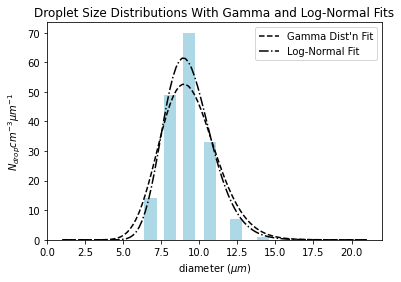

In [84]:
# fitted functions
D = np.linspace(1, 21, 100)
gamma_blue = N0 * D ** (alpha) * np.exp(-lam * D)
lognorm_blue = (
    NT
    / (np.sqrt(2 * np.pi) * sigma * D)
    * np.exp(-0.5 * ((np.log(D) - np.log(Dmode)) / sigma) ** 2)
)

# plot everything together
plt.bar(diameter, dens_blue, color="lightblue")
plt.plot(D, gamma_blue, "--", color="black", label="Gamma Dist'n Fit")
plt.plot(D, lognorm_blue, "-.", color="black", label="Log-Normal Fit")
plt.title('Droplet Size Distributions With Gamma and Log-Normal Fits')
plt.xlabel("diameter ($\mu m$)")
plt.ylabel("$N_{drop} cm^{-3}\mu m^{-1}$")
plt.legend();

## Question 2:
(2 points) <br>
Identify which of the two histograms in the figure above belongs to the respective altitudes (2320 m and 2780 m). Why?

Cooler temperatures would shift the equilibrium diameter to favour larger droplets $\therefore$ the RED distribution should represent the higher altidude (colder due to adiabatic expansion) sample, all other things equal.

**RED $\rightarrow$ 2780m <br> 
BLUE $\rightarrow$ 2320m**